In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [170]:
df = pd.read_csv("fraudTrain.csv")

Text(0.5, 1.0, 'Distribution of fraud')

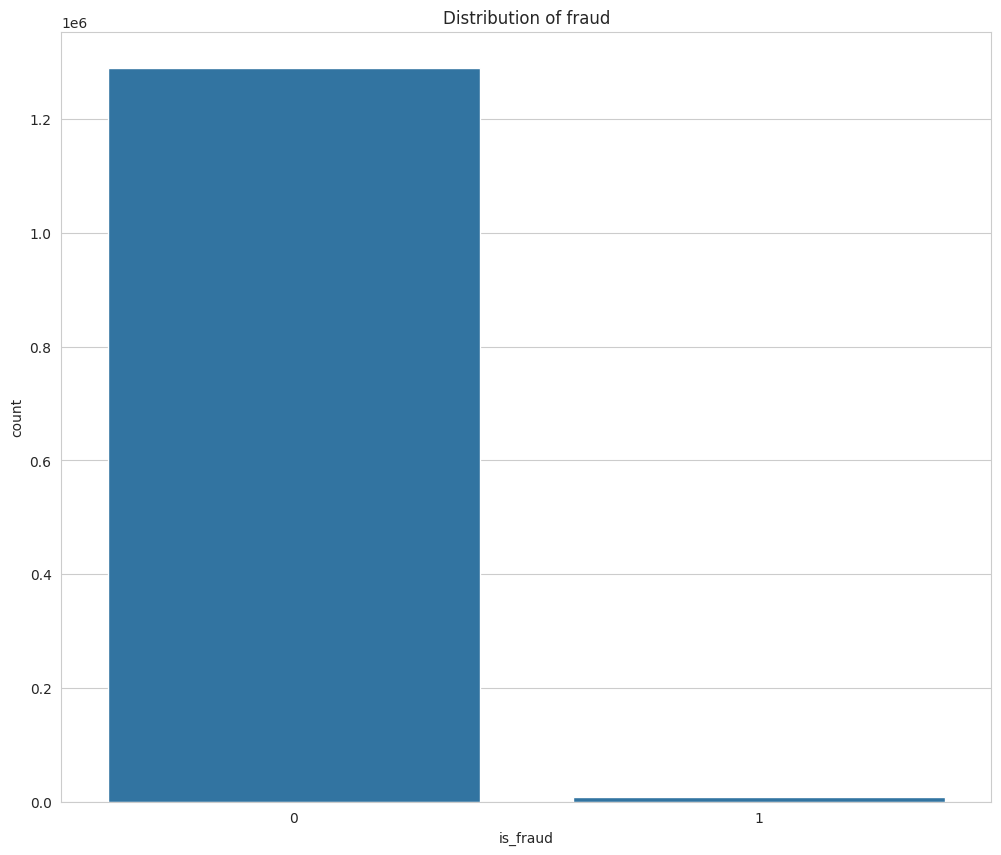

In [171]:
sns.set_style(style="whitegrid")
plt.figure(figsize = (12,10))

sns.countplot(x = "is_fraud", data=df)
plt.title("Distribution of fraud")

In [172]:
df[df['is_fraud'] == False].shape[0]
df[df['is_fraud'] == True].shape[0]

7506

In [173]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [174]:
fraud_job_count = df[df['is_fraud'] == True]['job'].value_counts().reset_index()
fraud_job_count

,job,count
0,Materials engineer,62
1,Trading standards officer,56
2,Naval architect,53
3,Exhibition designer,51
4,"Surveyor, land/geomatics",50
...,...,...
438,Statistician,3
439,Health physicist,3
440,Chartered loss adjuster,3
441,English as a second language teacher,2


Text(0.5, 1.0, 'Amount Distribution')

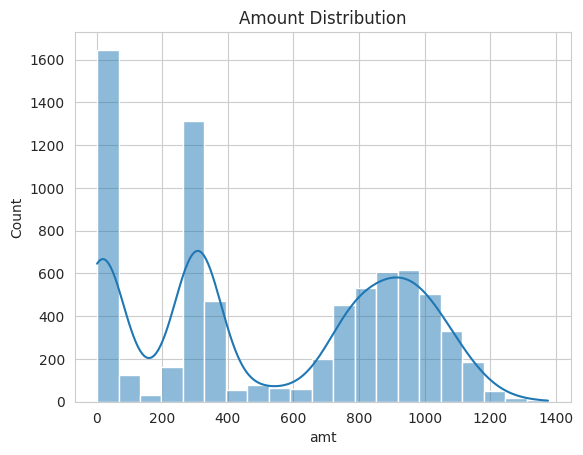

In [175]:
sns.histplot(data = df[df['is_fraud'] == True], x ="amt", kde = True)
plt.title("Amount Distribution")

In [176]:
fraud_zip_count = df[df['is_fraud'] == True]['zip'].value_counts().reset_index()
fraud_zip_count

,zip,count
0,15010,24
1,48088,23
2,16034,21
3,82514,21
4,68375,19
...,...,...
749,33811,2
750,36869,2
751,85020,2
752,28405,2


In [177]:
df['Age'] = (pd.to_datetime(df['trans_date_trans_time']) - pd.to_datetime(df['dob'])).dt.days // 365
df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour.astype(int)

Text(0.5, 1.0, 'Age Distribution')

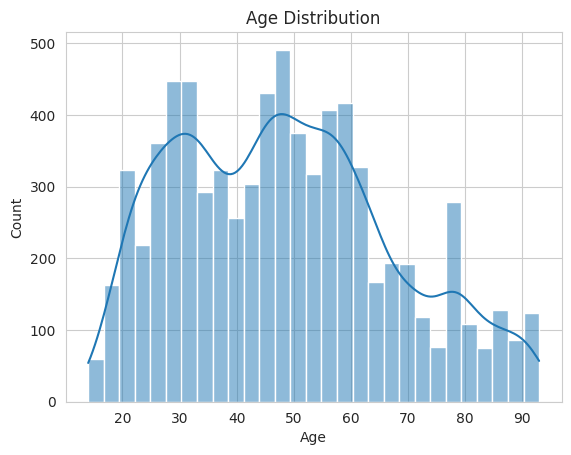

In [178]:
sns.histplot(data = df[df['is_fraud'] == True], x ="Age", kde = True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Gender Distribution')

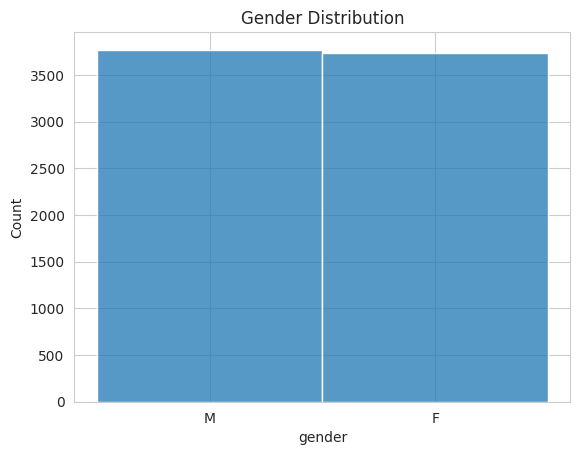

In [179]:
sns.histplot(data = df[df['is_fraud'] == True], x ="gender")
plt.title("Gender Distribution")

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [181]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("---------------------------")

  with open(filename, "wb") as file:
    pickle.dump(model, file)

  print(f"Model saves as {filename}")

In [182]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=0)


In [183]:
df_fraction = df.sample(frac=.15, random_state=42)
df_fraction = df_fraction.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'trans_num', 'cc_num' , 'dob', 'job', 'unix_time'], axis=1)

In [184]:
df_fraction = pd.get_dummies(df_fraction, drop_first= True)
X_fraction = df_fraction.drop('is_fraud', axis=1)
y_fraction = df_fraction['is_fraud']
X_fraction

,amt,zip,lat,long,city_pop,merch_lat,merch_long,Age,hour,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
1045211,194.51,15686,40.6153,-79.4545,972,40.420453,-78.865012,22,15,False,...,False,False,False,False,True,False,False,False,False,True
547406,52.32,97476,42.8250,-124.4409,217,42.758860,-123.636337,90,15,False,...,True,False,False,False,False,False,False,False,False,False
110142,6.53,15449,39.9636,-79.7853,184,40.475159,-78.898190,73,1,False,...,False,False,False,False,False,False,False,True,False,False
1285953,7.33,14425,42.9580,-77.3083,10717,43.767506,-76.542384,67,20,False,...,False,True,False,False,False,False,False,False,False,True
271705,64.29,82221,41.6423,-104.1974,635,41.040392,-104.092324,45,5,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231735,106.74,54499,44.8232,-89.1665,3223,45.239148,-88.245662,65,11,True,...,False,False,False,False,False,False,False,False,False,True
822702,93.65,48088,42.5164,-82.9832,134056,41.991158,-83.358109,39,4,False,...,False,False,False,False,False,False,False,False,False,True
972273,56.69,29819,34.0326,-82.2027,1523,33.071704,-81.963564,35,10,False,...,False,False,False,False,False,False,False,False,False,False
324753,434.96,29127,34.1832,-81.5324,8333,34.508929,-82.354739,24,22,False,...,False,False,False,False,False,False,False,True,False,False


In [185]:
numerical_cols = X_fraction.select_dtypes(include=['float64', 'int64']).columns
X_fraction[numerical_cols] = scaler.fit_transform(X_fraction[numerical_cols])

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

X_fraction

,amt,zip,lat,long,city_pop,merch_lat,merch_long,Age,hour,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
1045211,0.767300,-1.230411,0.408070,0.783254,-0.288300,0.366925,0.825354,-1.351745,0.320741,False,...,False,False,False,False,True,False,False,False,False,True
547406,-0.110832,1.807791,0.843507,-2.480997,-0.290792,0.824656,-2.420575,2.552737,0.320741,False,...,True,False,False,False,False,False,False,False,False,False
110142,-0.393620,-1.239214,0.279647,0.759251,-0.290901,0.377634,0.822949,1.576617,-1.733013,False,...,False,False,False,False,False,False,False,True,False,False
1285953,-0.388679,-1.277252,0.869716,0.938984,-0.256129,1.022093,0.993745,1.232104,1.054224,False,...,False,True,False,False,False,False,False,False,False,True
271705,-0.036908,1.241123,0.610448,-1.012111,-0.289412,0.488275,-1.003630,-0.031111,-1.146226,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231735,0.225253,0.211351,1.237268,0.078543,-0.280869,1.310159,0.145255,1.117266,-0.266046,True,...,False,False,False,False,False,False,False,False,False,True
822702,0.144412,-0.026794,0.782696,0.527208,0.151041,0.674382,0.499604,-0.375624,-1.292923,False,...,False,False,False,False,False,False,False,False,False,True
972273,-0.083844,-0.705421,-0.889100,0.583842,-0.286481,-1.071553,0.600709,-0.605300,-0.412743,False,...,False,False,False,False,False,False,False,False,False,False
324753,2.252262,-0.731126,-0.859423,0.632480,-0.263999,-0.790224,0.572348,-1.236907,1.347617,False,...,False,False,False,False,False,False,False,True,False,False


In [186]:
testing_df = pd.read_csv("fraudTest.csv")
testing_df['Age'] = (pd.to_datetime(testing_df['trans_date_trans_time']) - pd.to_datetime(testing_df['dob'])).dt.days // 365
testing_df['hour'] = pd.to_datetime(testing_df['trans_date_trans_time']).dt.hour.astype(int)

testing_features = testing_df.drop('is_fraud', axis=1)

testing_features = testing_features.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'trans_num', 'cc_num' , 'dob', 'job', 'unix_time'], axis=1)
numerical_cols = testing_features.select_dtypes(include=['float64', 'int64']).columns
testing_features[numerical_cols] = scaler.transform(testing_features[numerical_cols])
testing_features = testing_features.dropna()
testing_features = pd.get_dummies(testing_features, drop_first= True)

testing_target = testing_df['is_fraud']

X_test, y_test = testing_features, testing_target

testing_features
testing_features.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'Age', 'hour', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object')

<Axes: >

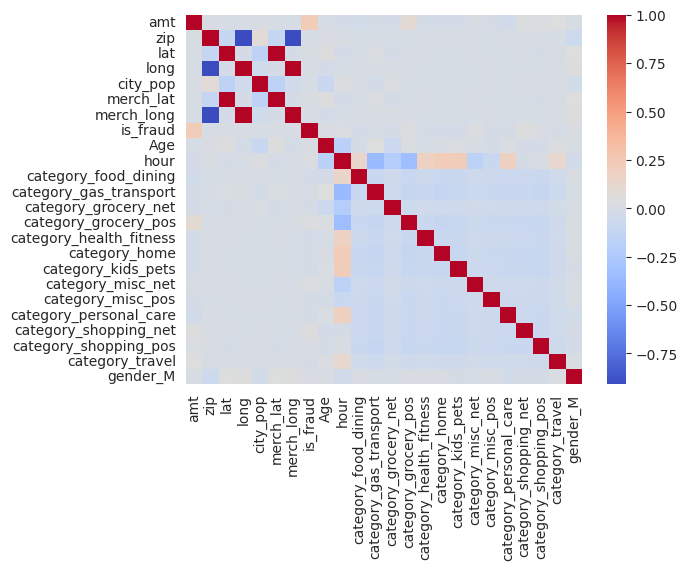

In [187]:
sns.heatmap(df_fraction.corr(), cmap="coolwarm")

In [188]:
X_fraction, y_fraction = smote.fit_resample(X_fraction, y_fraction)

X_test, y_test = testing_features, testing_target

In [189]:
X_fraction

,amt,zip,lat,long,city_pop,merch_lat,merch_long,Age,hour,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.767300,-1.230411,0.408070,0.783254,-0.288300,0.366925,0.825354,-1.351745,0.320741,False,...,False,False,False,False,True,False,False,False,False,True
1,-0.110832,1.807791,0.843507,-2.480997,-0.290792,0.824656,-2.420575,2.552737,0.320741,False,...,True,False,False,False,False,False,False,False,False,False
2,-0.393620,-1.239214,0.279647,0.759251,-0.290901,0.377634,0.822949,1.576617,-1.733013,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.388679,-1.277252,0.869716,0.938984,-0.256129,1.022093,0.993745,1.232104,1.054224,False,...,False,True,False,False,False,False,False,False,False,True
4,-0.036908,1.241123,0.610448,-1.012111,-0.289412,0.488275,-1.003630,-0.031111,-1.146226,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386695,-0.396347,0.898966,-0.289618,-0.548004,-0.291092,-0.122484,-0.524279,0.782883,1.484246,False,...,False,False,True,False,False,False,False,False,False,True
386696,-0.142932,1.462813,-0.591074,-1.248114,-0.288743,-0.488944,-1.206916,0.436682,1.347617,False,...,False,False,False,False,True,False,False,False,True,True
386697,-0.322097,-1.388900,0.718841,1.128547,-0.216908,0.847062,1.160264,-0.468093,1.347617,False,...,False,False,True,False,False,False,False,False,False,False
386698,4.930692,0.566029,1.396128,-1.747129,-0.290840,1.254519,-1.700525,-0.944384,1.494314,False,...,False,False,False,True,False,False,False,False,False,True


In [190]:
xgb_model = xgb.XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model, X_fraction, X_test, y_fraction, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state = 42)
evaluate_and_save_model(dt_model, X_fraction, X_test, y_fraction, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state = 42)
evaluate_and_save_model(rf_model, X_fraction, X_test, y_fraction, y_test, "rf_model.pkl")

# nb_model = GaussianNB()
# evaluate_and_save_model(nb_model, X_fraction, X_test, y_fraction, y_test, "nb_model.pkl")

# knn_model = KNeighborsClassifier()
# evaluate_and_save_model(knn_model, X_fraction, X_test, y_fraction, y_test, "knn_model.pkl")

# svm_model = SVC(random_state = 42)
# evaluate_and_save_model(svm_model, X_fraction, X_test, y_fraction, y_test, "svm_model.pkl")

XGBClassifier Accuracy: 0.9973

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.61      0.84      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.92      0.85    555719
weighted avg       1.00      1.00      1.00    555719

---------------------------
Model saves as xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.9967

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.79      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.90      0.82    555719
weighted avg       1.00      1.00      1.00    555719

---------------------------
Model saves as dt_model.pkl
RandomForestClassifier Accuracy: 0.9984

Classification Report:
              precision    recall  f1-score   supp

In [191]:
feature_importances_df = pd.DataFrame({
    'feature' : X_fraction.columns,
    'importance': rf_model.feature_importances_
})
feature_importances_df.sort_values("importance", ascending = False)

,feature,importance
0,amt,0.491585
8,hour,0.208230
10,category_gas_transport,0.033625
7,Age,0.027608
19,category_shopping_net,0.026550
12,category_grocery_pos,0.023671
4,city_pop,0.020692
1,zip,0.017485
3,long,0.015916
2,lat,0.015004


In [192]:

from sklearn.ensemble import VotingClassifier


In [193]:
xgb_model = xgb.XGBClassifier(random_state = 42, learning_rate = 0.6)
evaluate_and_save_model(xgb_model, X_fraction, X_test, y_fraction, y_test, "xgb_model.pkl")

XGBClassifier Accuracy: 0.9981

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.82      0.76      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.91      0.88    555719
weighted avg       1.00      1.00      1.00    555719

---------------------------
Model saves as xgb_model.pkl


In [194]:
dt_model = DecisionTreeClassifier(random_state = 42, max_depth=18)
evaluate_and_save_model(dt_model, X_fraction, X_test, y_fraction, y_test, "dt_model.pkl")

DecisionTreeClassifier Accuracy: 0.9940

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.38      0.84      0.52      2145

    accuracy                           0.99    555719
   macro avg       0.69      0.92      0.76    555719
weighted avg       1.00      0.99      1.00    555719

---------------------------
Model saves as dt_model.pkl


In [195]:
voting_clf = VotingClassifier(
    estimators = [('xgboost', xgb.XGBClassifier(random_state = 42, learning_rate = 0.6)), ('rf', RandomForestClassifier(random_state = 42))],
    voting='hard'
)
evaluate_and_save_model(voting_clf, X_fraction, X_test, y_fraction, y_test, "voting_clf_model.pkl")

VotingClassifier Accuracy: 0.9985

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.86      0.74      0.79      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.87      0.90    555719
weighted avg       1.00      1.00      1.00    555719

---------------------------
Model saves as voting_clf_model.pkl


In [196]:
voting_clf = VotingClassifier(
    estimators = [('xgboost', xgb.XGBClassifier(random_state = 42, learning_rate = 0.6)), ('rf', RandomForestClassifier(random_state = 42))],
    voting='soft'
)
evaluate_and_save_model(voting_clf, X_fraction, X_test, y_fraction, y_test, "voting_clf_softl.pkl")

VotingClassifier Accuracy: 0.9983

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.80      0.78      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.90      0.89    555719
weighted avg       1.00      1.00      1.00    555719

---------------------------
Model saves as voting_clf_softl.pkl


In [197]:
y_prob = voting_clf.predict_proba(X_test)[:, 1]

In [198]:
y_pred = (y_prob >= 0.5).astype(int)

false_negatives = (y_pred == 0) & (y_test == 1)  # Predicted 0, actual 1
false_positives = (y_pred == 1) & (y_test == 0)  # Predicted 1, actual 0

true_negatives = (y_pred == 0) & (y_test == 0)  # Predicted 0, actual 1
true_positives = (y_pred == 1) & (y_test == 1)  # Predicted 1, actual 0

In [199]:
fn_probabilities = y_prob[false_negatives]

# Probabilities for false positives
fp_probabilities = y_prob[false_positives]



results = pd.DataFrame({
    'True Label': y_test[false_negatives],
    'Predicted Probability': fn_probabilities,
    'Predicted Class': y_pred[false_negatives]
})

results_fp = pd.DataFrame({
    'True Label': y_test[false_positives],
    'Predicted Probability': fp_probabilities,
    'Predicted Class': y_pred[false_positives]
})

# Display results
print("False Negatives:")
print(results)

print("\nFalse Positives:")
print(results_fp)

False Negatives:
        True Label  Predicted Probability  Predicted Class
1685             1               0.000022                0
1891             1               0.254809                0
2173             1               0.112319                0
2495             1               0.172905                0
5757             1               0.042509                0
...            ...                    ...              ...
504945           1               0.010969                0
505085           1               0.105391                0
505195           1               0.037075                0
511244           1               0.192270                0
511374           1               0.190053                0

[424 rows x 3 columns]

False Positives:
        True Label  Predicted Probability  Predicted Class
1044             0               0.828758                1
1586             0               0.705351                1
1695             0               0.773540               

In [200]:
tn_probabilities = y_prob[true_negatives]

# Probabilities for false positives
tp_probabilities = y_prob[true_positives]



results_tn = pd.DataFrame({
    'True Label': y_test[true_negatives],
    'Predicted Probability': tn_probabilities,
    'Predicted Class': y_pred[true_negatives]
})

results_tp = pd.DataFrame({
    'True Label': y_test[true_positives],
    'Predicted Probability': tp_probabilities,
    'Predicted Class': y_pred[true_positives]
})

# Display results
print("True Negatives:")
print(results_tn)

print("\nTrue Positives:")
print(results_tp)

True Negatives:
        True Label  Predicted Probability  Predicted Class
0                0           5.073586e-09                0
1                0           5.006991e-03                0
2                0           4.025567e-06                0
3                0           1.501242e-07                0
4                0           5.249847e-07                0
...            ...                    ...              ...
555714           0           1.833004e-04                0
555715           0           1.185210e-05                0
555716           0           2.134114e-02                0
555717           0           1.752558e-02                0
555718           0           3.525708e-06                0

[553055 rows x 3 columns]

True Positives:
        True Label  Predicted Probability  Predicted Class
1767             1               0.999999                1
1781             1               0.979957                1
1784             1               0.989660              

In [201]:
results.describe()

,True Label,Predicted Probability,Predicted Class
count,424.0,4.240000e+02,424.0
mean,1.0,1.442263e-01,0.0
std,0.0,1.490731e-01,0.0
min,1.0,3.743371e-08,0.0
25%,1.0,1.654603e-02,0.0
50%,1.0,7.689952e-02,0.0
75%,1.0,2.550027e-01,0.0
max,1.0,4.965430e-01,0.0


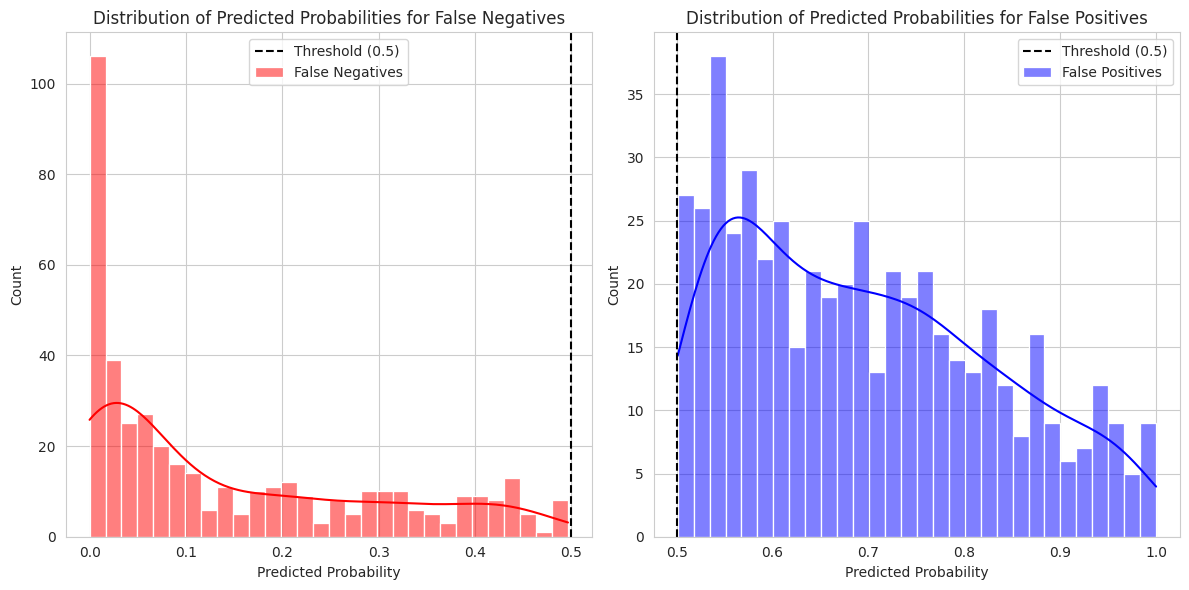

In [202]:
plt.figure(figsize=(12, 6))

# Histogram for False Negatives
plt.subplot(1, 2, 1)
sns.histplot(fn_probabilities, bins=30, kde=True, color='red', label='False Negatives', stat='count')
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold (0.5)')
plt.title('Distribution of Predicted Probabilities for False Negatives')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()

# Histogram for False Positives
plt.subplot(1, 2, 2)
sns.histplot(fp_probabilities, bins=30, kde=True, color='blue', label='False Positives', stat='count')
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold (0.5)')
plt.title('Distribution of Predicted Probabilities for False Positives')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()

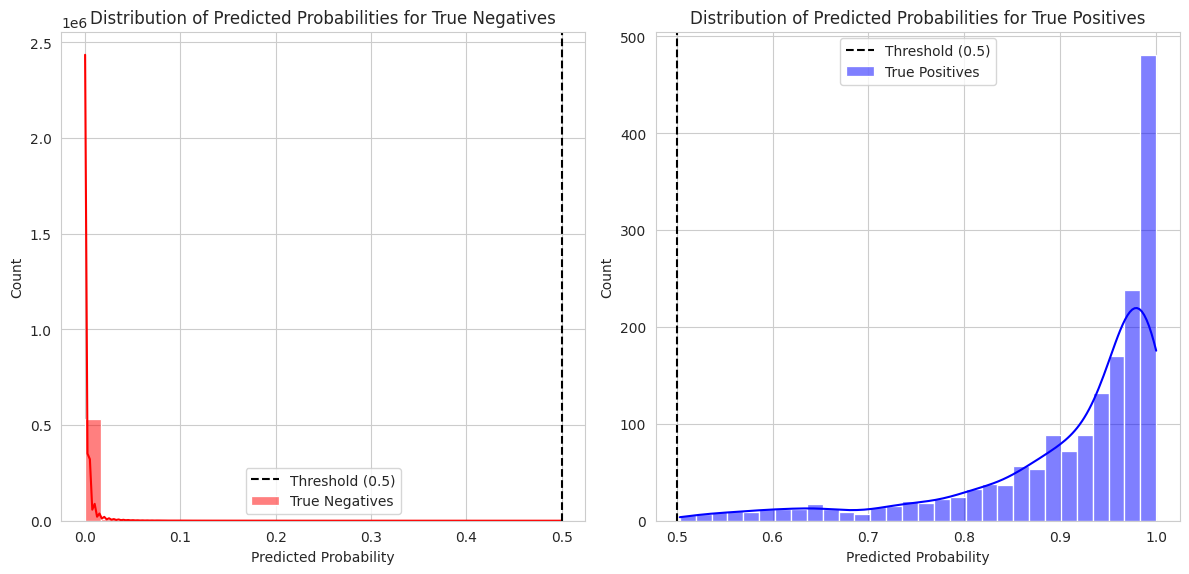

In [203]:
plt.figure(figsize=(12, 6))

# Histogram for True Negatives
plt.subplot(1, 2, 1)
sns.histplot(tn_probabilities, bins=30, kde=True, color='red', label='True Negatives', stat='count')
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold (0.5)')
plt.title('Distribution of Predicted Probabilities for True Negatives')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()

# Histogram for True Positives
plt.subplot(1, 2, 2)
sns.histplot(tp_probabilities, bins=30, kde=True, color='blue', label='True Positives', stat='count')
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold (0.5)')
plt.title('Distribution of Predicted Probabilities for True Positives')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()